<a href="https://colab.research.google.com/github/timmersarruda/IA/blob/main/Timmers_Araujo_Arruda_Junior_Notebook_exercicio_pratico_fundamentos_de_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA - 2024.2 (Prof. Rafael Magalhães)
## Turmas LCC e SI

### Exercício Prático - Fundamentos de IA

Classificação de Qualidade de Vinhos do tipo 'Tinto' (Arquivo fornecido junto com notebook - 'winequality-red.csv')

Olá Pessoal,

Ests prática de código tem três principais objetivos:

- Recapitular alguns elementos da linguem Python (sintaxe, estrutura, etc.)
- Conhecer algumas das bibliotecas mais utilizadas na área de IA e ML em Python
- Captar o essencial do workflow (conjunto de etapas) para criação de 'modelos' de classificadores inteligentes.

Para tanto, siga as instruções e conclua as etapas a seguir. Você é livre para buscar ajuda nas página oficiais de cada biblioteca se desejar.

As Etapas que deverá realizar são:

- Extração de Atributos
- Divisão dos Dados
- Treinamento do(s) Modelo(s)
- Avaliação do(s) Modelo(s)

# 1 - Extração dos Atributos

Você deverá:

- 1.1 - carregar os dados de classificação de Vinhos Vermelhos utilizando o Pandas;
- 1.2 - Avaliar minimamente algumas informações estatísticas do conjunto de dados;
- 1.3 - Criar algumas visualizações dos dados, e, por fim;
- 1.4 - Determinar o conjunto de dados (atributos) que serão utilizados para compor o 'dataset' para criar o modelo.



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estatísticas descritivas
       fixed acidity  volatile acidity  citric acid  residual sugar  \

<ipython-input-40-ccc2dd57dffb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['quality'], palette='coolwarm')


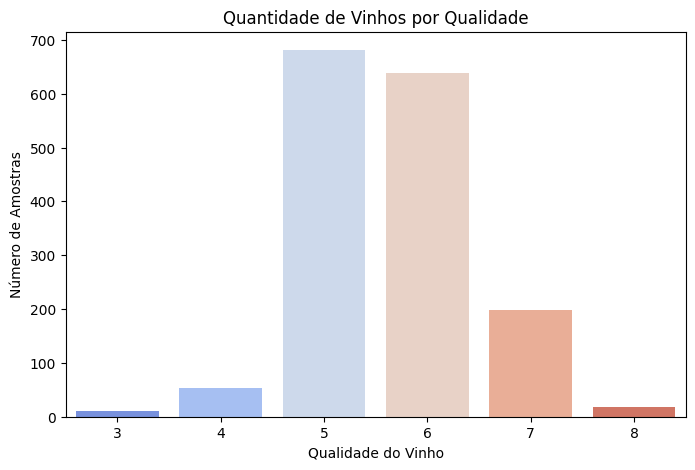

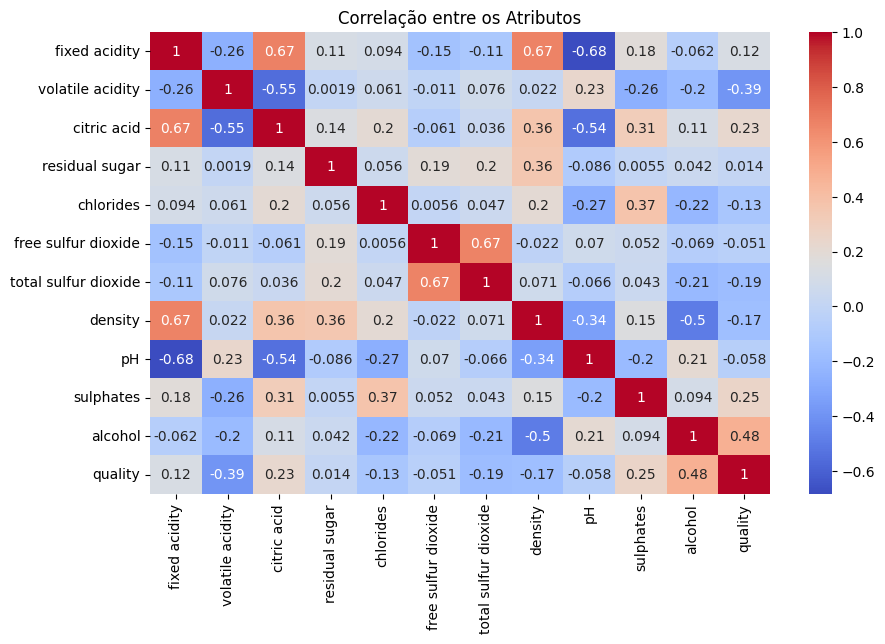


Atributos selecionados para treinar o modelo ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']


In [40]:
# Seus códigos para a etapa 1 deverão ser criados aqui:

# 1.1
# Biblioteca para carregar e realizar operações tabulares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv( url, delimiter = ";")

# 1.2
# Avaliação estatística básica
print("\nInformações do dataset:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas")
print(df.describe())

# 1.3
# Criando algumas visualizações
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['quality'], palette='coolwarm')
ax.set_title("Quantidade de Vinhos por Qualidade")
ax.set_xlabel("Qualidade do Vinho")
ax.set_ylabel("Número de Amostras")

plt.show() # Exibe o gráfico

# Gráfico de calor para ver a correlação entre os atributos
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Correlação entre os Atributos")
plt.show()

# 1.4
# Determiando o conjunto de dados
correlacoes = df.corr()['quality'].abs().sort_values(ascending=False)
atributos_escolhidos = correlacoes[correlacoes > 0.2].index.tolist()
atributos_escolhidos.remove('quality')

print("\nAtributos selecionados para treinar o modelo", atributos_escolhidos)

# dica: lembre-se de pesquisar os argumentos do método read_csv do pandas,
# especialmente o 'names' e o 'delimiter'


# 2 - Divisão dos Dados

Usando a técina que você desejar, defina um critério para divisão dos dados e crie quatro variáveis:
```
X_train, X_test, y_train, y_test
```
cada um contendo os dados referentes às entradas e saídas de treinamento e etradas e saídas do dados de testes.

In [43]:
from re import X
# Seus códigos para a etapa 2 deverão ser criados aqui:

# Importando as bibliotecas
from sklearn.model_selection import train_test_split

# Definindo s dados de entrada (X) e saida (Y)
# X deve ser os atributos escolhidos do dataframe df
X = df[atributos_escolhidos]
# y Deve ser a coluna 'quality' do dataframe df
y = df['quality']
# Definindo os dados de entrada (X) e saída (Y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Verificando os tamanhos dos conjuntos
print("Tamanho de X train:", X_train.shape)
print("Tamanho de X teste:", X_train.shape)
print("Tamanho de Y train:", y_train.shape)
print("Tamanho de Y teste:", y_test.shape)


Tamanho de X train: (1279, 4)
Tamanho de X teste: (1279, 4)
Tamanho de Y train: (1279,)
Tamanho de Y teste: (320,)


# 3 - Treinamento do Modelo

Na etapa de treinamento caberá a você escolher um modelo disponível na biblioteca scikit-learn (sklearn), dentre os vários. Instanciar um objeto, utilizar os dados de treinamento para ajustar o modelo (fit, treinar) e realizar alguns exemplos de predição.

In [51]:
# Seus códigos para a etapa 3 deverão ser criados aqui:

# Importando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criando modelo
modelo = LogisticRegression(max_iter=1000) # Aumentar as interações p/ melhor convergência

# Treinando o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# Realizando predições com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Dica: para evitar resultados inesperados, toda vez que alterar o conjunto
# de dados é boa prática recriar o modelo.


Acurácia do modelo: 0.56


# 4 - Avaliação do Modelo

Na quarta e última etapa você deverá utilizar alguma técnica de checagem da qualidade do resultado obtido, por exemplo o percentual de acertos, ou a matrix de validação, precisão, acurácia ou qualquer outra da sua escolha.

Acurácia do modelo:  0.56

Relatório de classificação: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.81      0.69       130
           6       0.54      0.53      0.54       132
           7       0.33      0.12      0.18        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.51      0.56      0.52       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


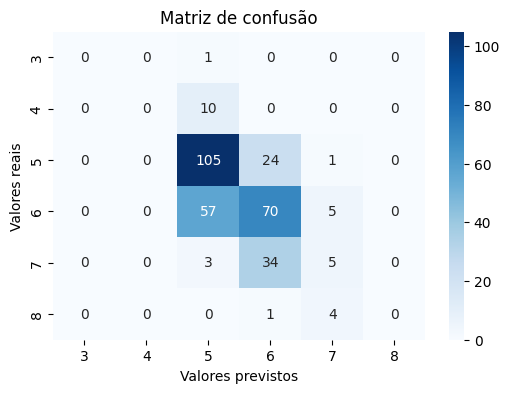

In [59]:
# Seus códigos para a etapa 4 deverão ser criados aqui:
# Importando as bibliotecas necessárias
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy: .2f}")

# Relatório com precuisão, recall e F1-score
print("\nRelatório de classificação: ")
print(classification_report(y_test, y_pred))

# Matriz de confução
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.title("Matriz de confusão")
plt.show()


Ao término da atividade você deverá enviar seu código na plataforma da turma para concluir a atividade de ensino prática.